#### Ch4_Q13
This question should be answered using the Weekly data set, which is part of the ISLP package. <br>
This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, <br>
089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
!pip install ISLP

In [65]:
from ISLP import load_data
df = load_data('Weekly')
print(df)

      Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0     1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1     1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2     1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3     1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4     1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up
...    ...    ...    ...    ...    ...    ...       ...    ...       ...
1084  2010 -0.861  0.043 -2.173  3.599  0.015  3.205160  2.969        Up
1085  2010  2.969 -0.861  0.043 -2.173  3.599  4.242568  1.281        Up
1086  2010  1.281  2.969 -0.861  0.043 -2.173  4.835082  0.283        Up
1087  2010  0.283  1.281  2.969 -0.861  0.043  4.454044  1.034        Up
1088  2010  1.034  0.283  1.281  2.969 -0.861  2.707105  0.069        Up

[1089 rows x 9 columns]


(a) Produce some numerical and graphical summaries of the Weekly data.<br>
    Do there appear to be any patterns?

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

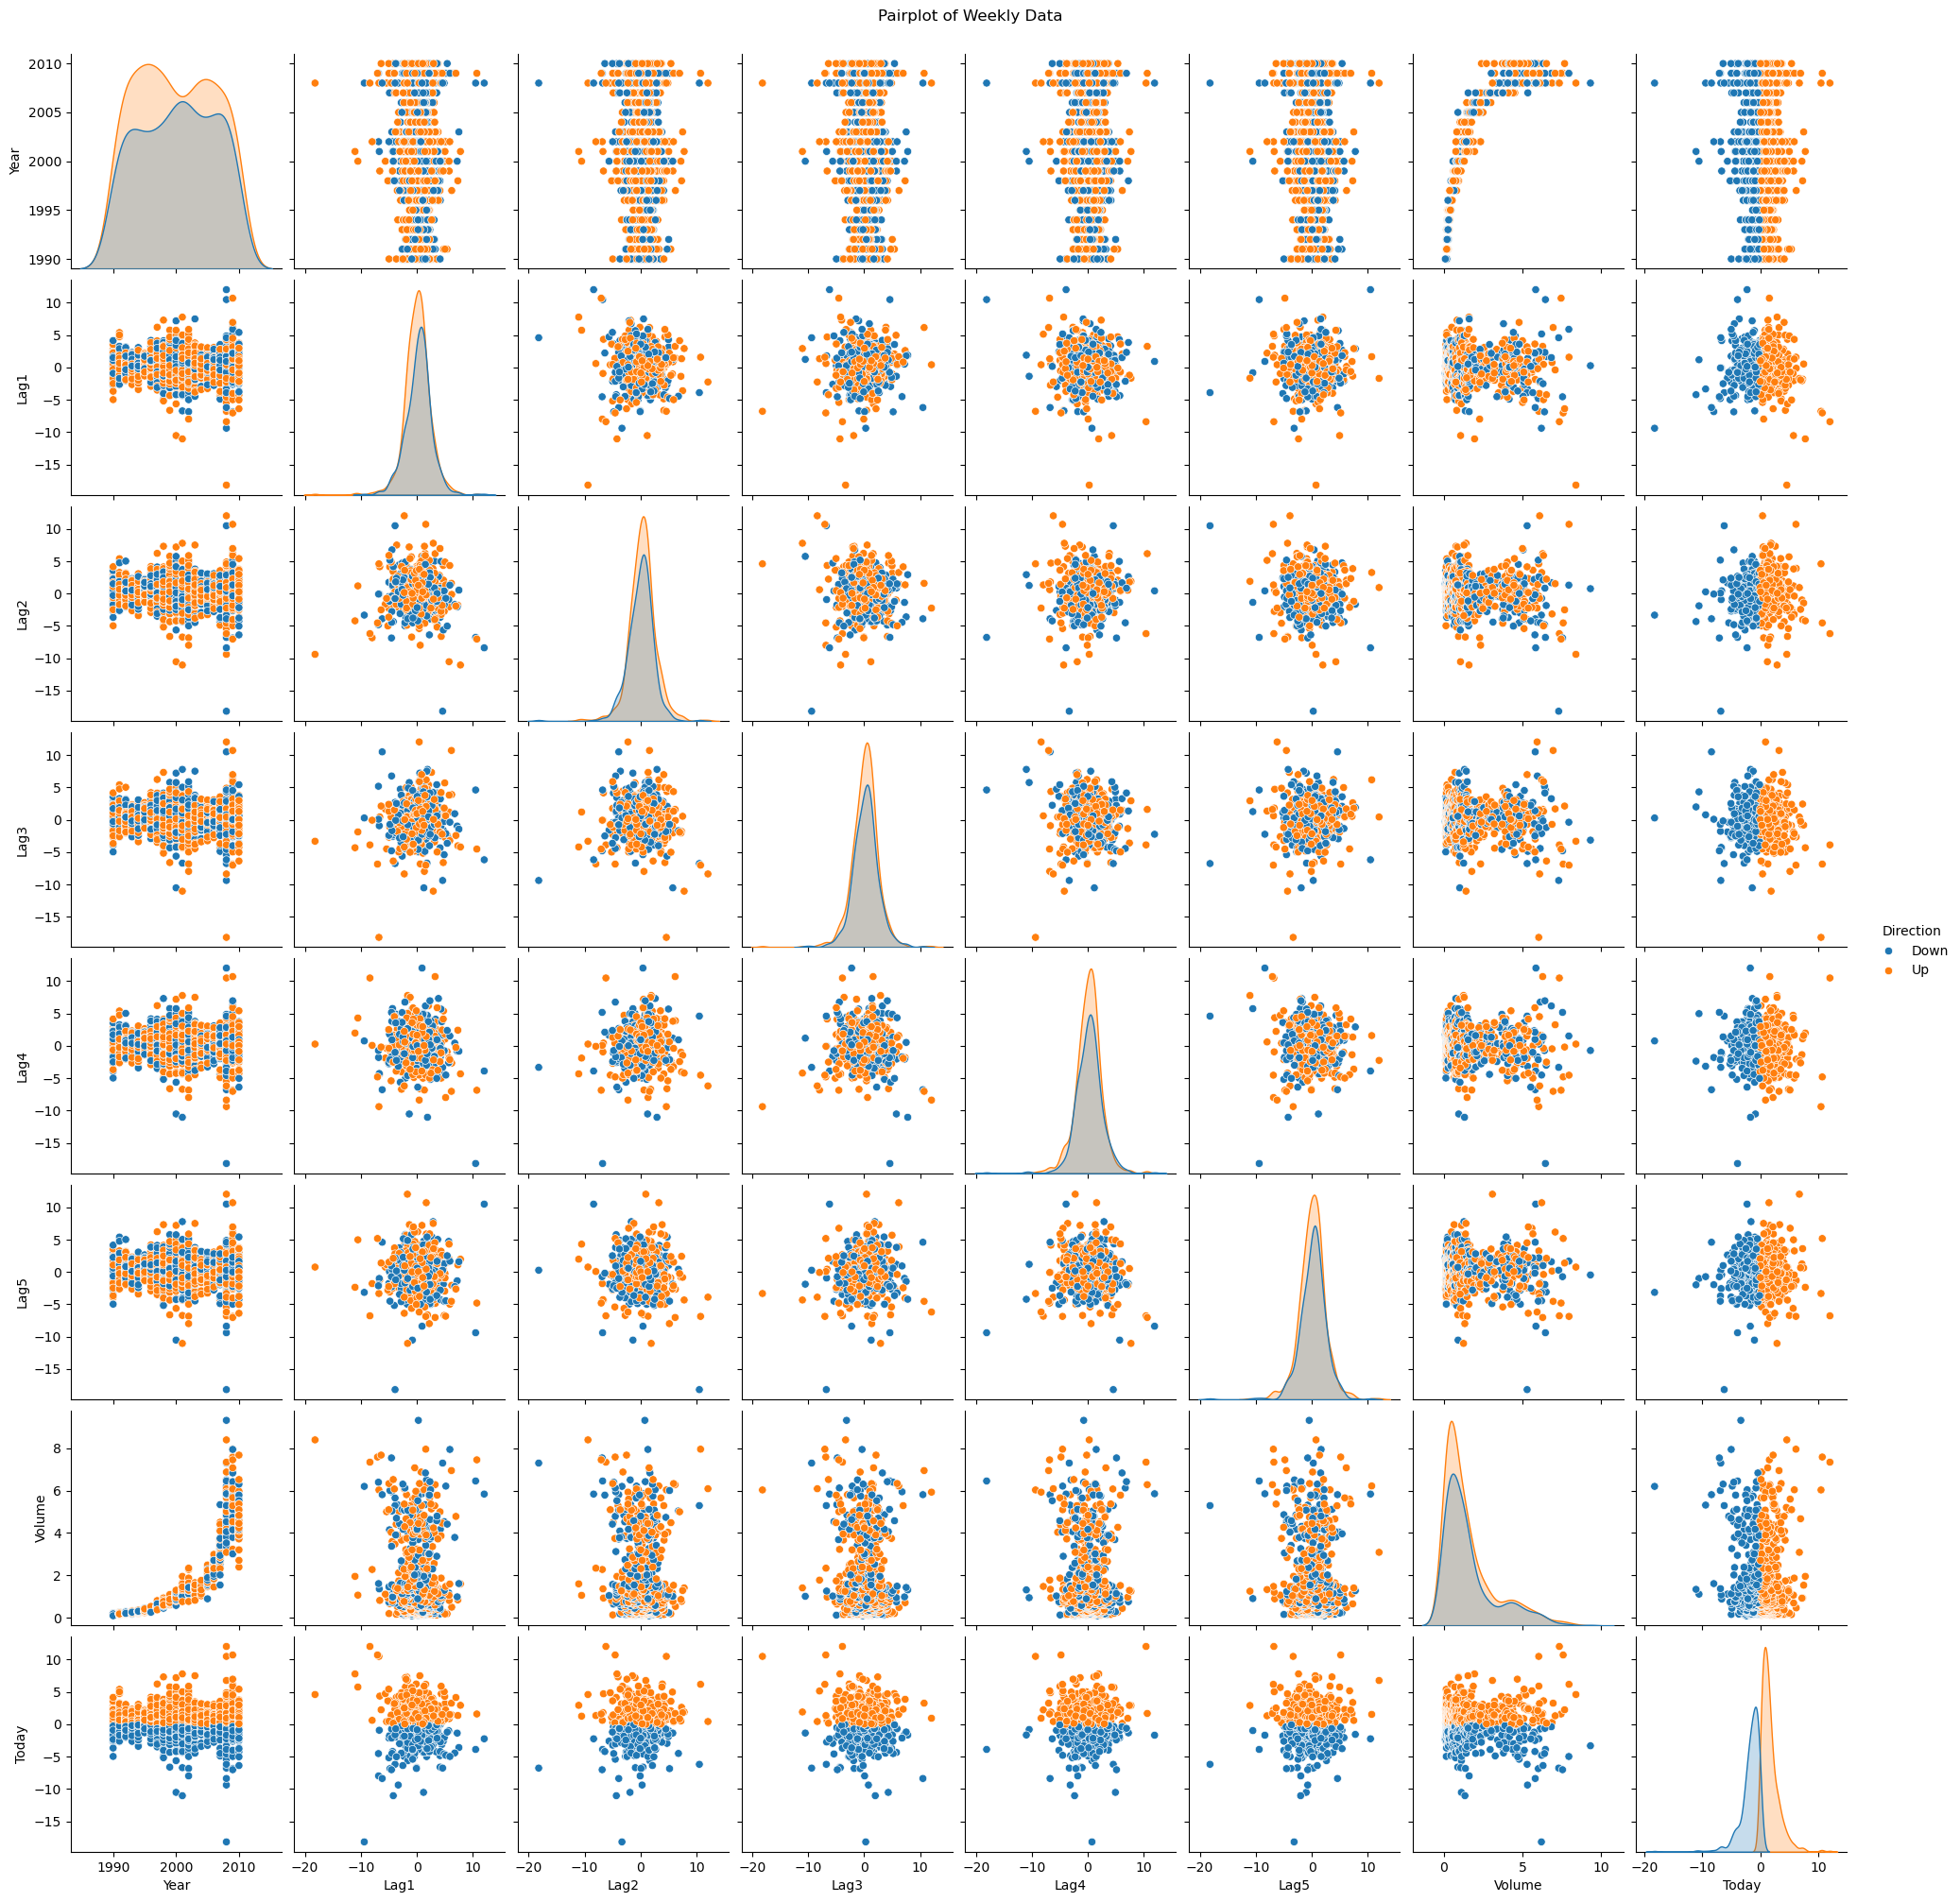

In [66]:
# Numerical summary
columns_to_include = df.columns.difference(['Direction'])
numerical_summary = df.describe()
print(numerical_summary)

# Check for patterns with graphical summaries
# Pairplot to visualize relationships
sns.pairplot(df, hue='Direction')
plt.suptitle('Pairplot of Weekly Data', y=1.01)
plt.show()

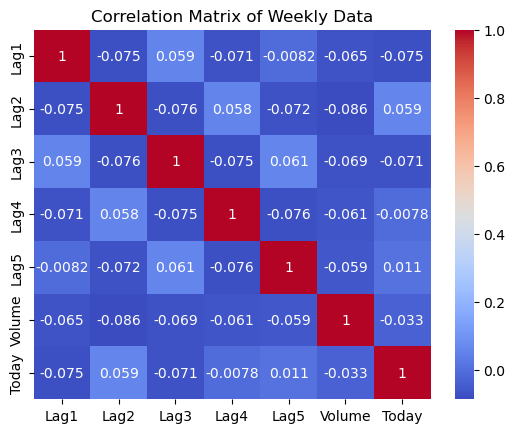

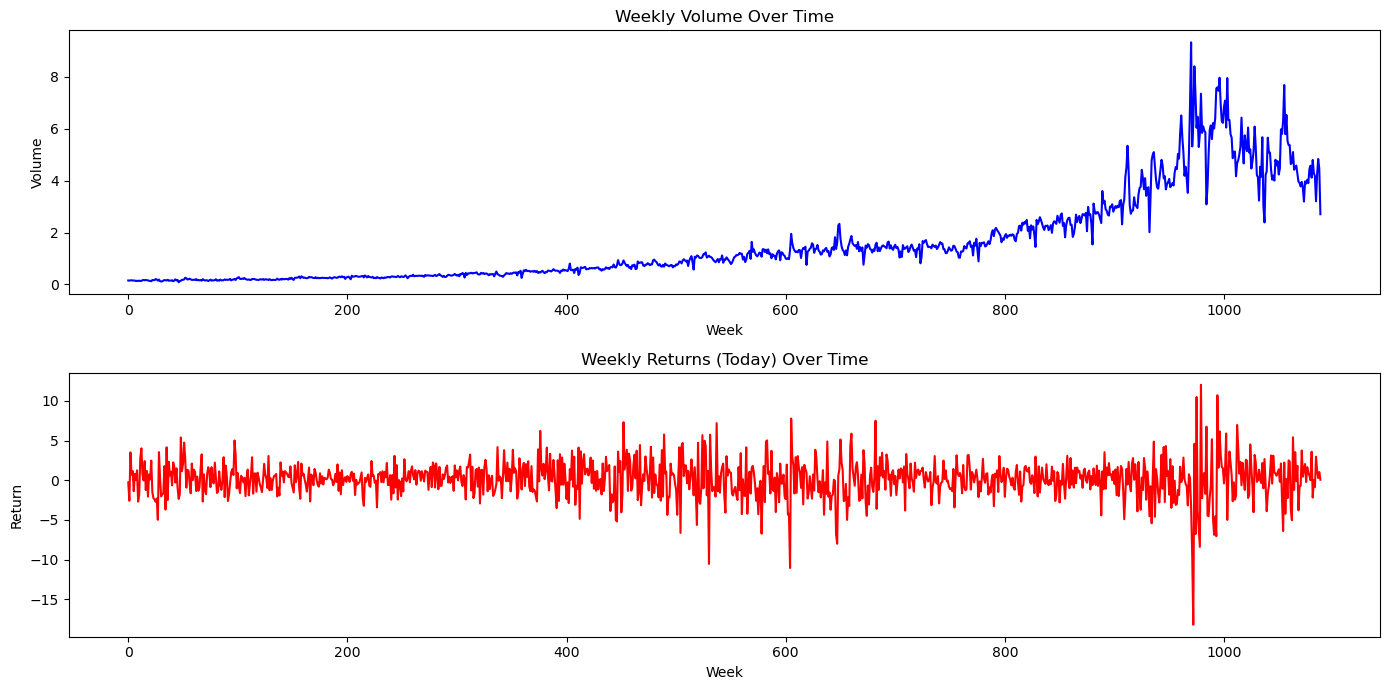

In [67]:
numeric_cols = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']

# Plotting Correlation Matrix
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Weekly Data')
plt.show()

# Time series plot for 'Volume' and 'Today'
plt.figure(figsize=(14, 7))

# Plotting Volume
plt.subplot(2, 1, 1)
plt.plot(df['Volume'], color='blue')
plt.title('Weekly Volume Over Time')
plt.xlabel('Week')
plt.ylabel('Volume')

# Plotting Today
plt.subplot(2, 1, 2)
plt.plot(df['Today'], color='red')
plt.title('Weekly Returns (Today) Over Time')
plt.xlabel('Week')
plt.ylabel('Return')

plt.tight_layout()
plt.show()

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume
as predictors.<br>
Use the summary function to print the results. Do any of the predictors appear to be statistically significant? <br>
If so, which ones?

In [68]:
# Convert 'Direction' to binary: Up = 1, Down = 0
df['Direction_binary'] = df['Direction'].apply(lambda x: 1 if x == 'Up' else 0)

# Independent variable and Dependent variable
X = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = df['Direction_binary']

# Add intercept term
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Direction_binary   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                0.006580
Time:                        02:45:52   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

(c) Compute the confusion matrix and overall fraction of correct predictions.<br>
Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [69]:
# Predict
df['predicted'] = result.predict(X) > 0.5

# Compute the confusion matrix
conf_matrix = confusion_matrix(df['Direction_binary'], df['predicted'])
df1 = pd.DataFrame(conf_matrix, 
                              index=['Actual Down', 'Actual Up'], 
                              columns=['Predicted Down', 'Predicted Up'])
print(df1)

# Compute the probability of the correctly predicted 
correct_down = df1.loc['Actual Down', 'Predicted Down']
correct_up = df1.loc['Actual Up', 'Predicted Up']

total_actual_down = df1.loc['Actual Down'].sum()
total_actual_up = df1.loc['Actual Up'].sum()

correct_pred_down = correct_down / total_actual_down
correct_pred_up = correct_up / total_actual_up

print(f"Correctly Predicted Down: {correct_pred_down:.2f}")
print(f"Correctly Predicted Up: {correct_pred_up:.2f}")

# Calculate accuracy
accuracy = accuracy_score(df['Direction_binary'], df['predicted'])
print(f"Accuracy: {accuracy * 100:.2f}%")

             Predicted Down  Predicted Up
Actual Down              54           430
Actual Up                48           557
Correctly Predicted Down: 0.11
Correctly Predicted Up: 0.92
Accuracy: 56.11%


(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor.<br> 
Compute the confusion matrix and the overall fraction of correct predictions for the held out data <br>
(that is, the data from 2009 and 2010).

In [70]:
# Split the data into training and testing sets
train = df[df['Year'] < 2009]
test = df[df['Year'] >= 2009]

# Using Lag2 as train-variable.
X_train = sm.add_constant(train[['Lag2']])
y_train = train['Direction_binary']
X_test = sm.add_constant(test[['Lag2']])
y_test = test['Direction_binary']

# Fit model
model_train = sm.Logit(y_train, X_train)
result_train = model_train.fit()

# Predict
test.loc[:,'predicted'] = result_train.predict(X_test) > 0.5

# Compute the confusion matrix and accuracy
conf_matrix_test = confusion_matrix(y_test, test['predicted'])
df2 = pd.DataFrame(conf_matrix_test, 
                    index=['Actual Down', 'Actual Up'], 
                    columns=['Predicted Down', 'Predicted Up'])
print(df2)


# Compute the probability of the correctly predicted 
correct_down = df2.loc['Actual Down', 'Predicted Down']
correct_up = df2.loc['Actual Up', 'Predicted Up']

total_actual_down = df2.loc['Actual Down'].sum()
total_actual_up = df2.loc['Actual Up'].sum()

correct_pred_down = correct_down / total_actual_down
correct_pred_up = correct_up / total_actual_up

print(f"Correctly Predicted Down(Lag2): {correct_pred_down:.2f}")
print(f"Correctly Predicted Up(Lag2): {correct_pred_up:.2f}")


accuracy_test = accuracy_score(y_test, test['predicted'])
print(f"Accuracy(Lag2): {accuracy_test * 100:.2f}%")

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
             Predicted Down  Predicted Up
Actual Down               9            34
Actual Up                 5            56
Correctly Predicted Down(Lag2): 0.21
Correctly Predicted Up(Lag2): 0.92
Accuracy(Lag2): 62.50%
